In [1]:
%matplotlib inline
import numpy as np
import pylab

import urllib.request
urllib.request.urlretrieve('https://cs.unc.edu/Courses/comp116-f17/media/fedata.npz', 'fedata.npz')

('fedata.npz', <http.client.HTTPMessage at 0x114a23080>)

In [2]:
with np.load('fedata.npz') as data:
    BigNames = list(data['names'])
    BigYears = data['years']
    BigPopulations = data['populations']


In [3]:
BN = BigNames
BY = BigYears
BP = BigPopulations

# With this data what might be asked:
1. Population curves for some countries over some years

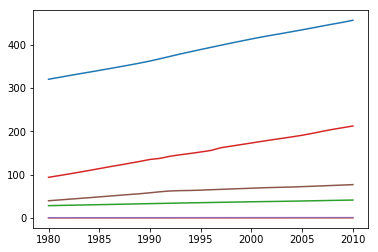

In [4]:
#pylab.plot(X,Y)
#pylab.plot(Y)-- they will generate x values
#pylab.plot(x1,y1,'m1',y2,'m2')
pylab.plot(BY,BP[:,:6])

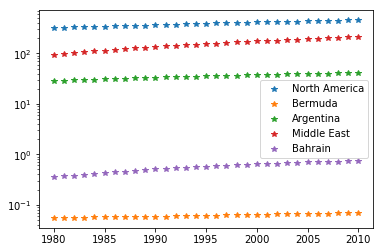

In [5]:
pylab.semilogy(BY, BP[:,:5],'*')
pylab.legend(BN[:5])

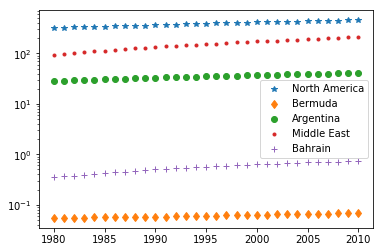

In [6]:
pylab.semilogy(BY, BP[:,0],'*')
pylab.semilogy(BY, BP[:,1],'d')
pylab.semilogy(BY, BP[:,2],'o')
pylab.semilogy(BY, BP[:,3],'.')
pylab.semilogy(BY, BP[:,4],'+')
pylab.legend(BN[:5])

(array([ 189.,    3.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,    1.]),
 array([  2.16000000e-03,   6.85303885e+02,   1.37060561e+03,
          2.05590733e+03,   2.74120906e+03,   3.42651078e+03,
          4.11181251e+03,   4.79711423e+03,   5.48241596e+03,
          6.16771768e+03,   6.85301941e+03]),
 <a list of 10 Patch objects>)

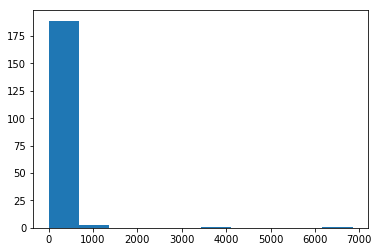

In [7]:
pylab.hist(BP[-1,:])

(array([  6.,   4.,  19.,  28.,  19.,  56.,  38.,  16.,   6.,   2.]),
 array([-2.66554625, -2.01540343, -1.36526061, -0.71511779, -0.06497496,
         0.58516786,  1.23531068,  1.8854535 ,  2.53559632,  3.18573914,
         3.83588196]),
 <a list of 10 Patch objects>)

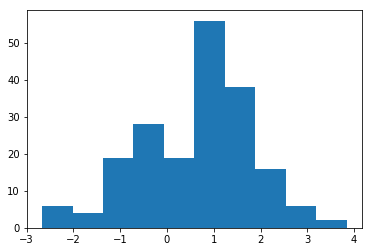

In [8]:
pylab.hist(np.log10(BP[-1,:]))

In [9]:
D = np.random.randint(1,100,20)
D

array([39, 64, 65, 58, 99, 38, 38, 49, 97, 29, 26, 74, 62, 91, 48, 37, 49,
        1, 63,  5])

<Container object of 20 artists>

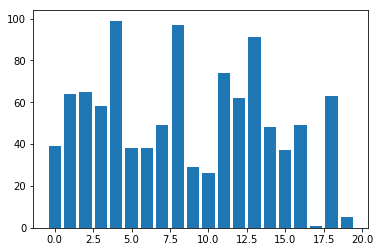

In [10]:
pylab.bar(np.arange(len(D)),D)

Write a function that returns the relative change in population in the last 2 years for all the countries

In [11]:
def F1(N,Y,P):
    Y=Y[-2:]
    P=P[-2:,:]
    PC=P[-1,:]-P[-2,:] ##P[-1,:]/P[-2,:]= THE rate of change
    RPC= PC/P[-2,:] ##relative change
    return RPC
F1(BN,BY,BP)

array([ 0.01052665,  0.00633844,  0.01050067,  0.01868909,  0.01274856,
        0.01258023,  0.02508294,  0.01662911,  0.02198016,  0.03587704,
        0.00632544,  0.00936433,  0.01996474,  0.00916848,  0.01590714,
        0.01999404,  0.03690744,  0.02787266,  0.02306728,  0.01193714,
        0.02100663,  0.00372466,  0.03004835,  0.01930302,  0.03147293,
        0.03698642,  0.0219738 ,  0.01492478,  0.02172327,  0.02074215,
        0.02786933,  0.02818723,  0.02150049,  0.03237469,  0.02142545,
        0.02195634,  0.02035373,  0.02724804,  0.03256965,  0.01998033,
        0.02591559,  0.01892304,  0.01761285,  0.02645163,  0.02031996,
        0.0267622 ,  0.00178485,  0.02837816,  0.0216765 ,  0.03041994,
        0.02786258,  0.0262675 ,  0.0241477 ,  0.01189528,  0.007662  ,
        0.01094001,  0.01809797,  0.03737166,  0.02002458,  0.        ,
        0.0288164 ,  0.0039267 ,  0.02155723,  0.02385808,  0.02624735,
        0.00983082,  0.02212722,  0.02852211,  0.00115427,  0.02

In [13]:
F1(BN,BY,BP)+1 ##rate of change

array([ 1.01052665,  1.00633844,  1.01050067,  1.01868909,  1.01274856,
        1.01258023,  1.02508294,  1.01662911,  1.02198016,  1.03587704,
        1.00632544,  1.00936433,  1.01996474,  1.00916848,  1.01590714,
        1.01999404,  1.03690744,  1.02787266,  1.02306728,  1.01193714,
        1.02100663,  1.00372466,  1.03004835,  1.01930302,  1.03147293,
        1.03698642,  1.0219738 ,  1.01492478,  1.02172327,  1.02074215,
        1.02786933,  1.02818723,  1.02150049,  1.03237469,  1.02142545,
        1.02195634,  1.02035373,  1.02724804,  1.03256965,  1.01998033,
        1.02591559,  1.01892304,  1.01761285,  1.02645163,  1.02031996,
        1.0267622 ,  1.00178485,  1.02837816,  1.0216765 ,  1.03041994,
        1.02786258,  1.0262675 ,  1.0241477 ,  1.01189528,  1.007662  ,
        1.01094001,  1.01809797,  1.03737166,  1.02002458,  1.        ,
        1.0288164 ,  1.0039267 ,  1.02155723,  1.02385808,  1.02624735,
        1.00983082,  1.02212722,  1.02852211,  1.00115427,  1.02

## Average population change over certain number of years

In [12]:
#rates is thing you multiply (1.09)
#changes are things you add(100 +9)

## Which contry had the greatest growth rate in the first five years